---
layout: page
title: Aprendizado na Prática
nav_order: 21
---

[<img src="./colab_favicon_small.png" style="float: right;">](https://colab.research.google.com/github/icd-ufmg/icd-ufmg.github.io/blob/master/_lessons/21-pratica.ipynb)


# Aprendizado na Prática

{: .no_toc .mb-2 }

Fazendo uso a regressão e classicação knn e logística!
{: .fs-6 .fw-300 }

{: .no_toc .text-delta }
Resultados Esperados

1. Saber executar o KNN do SKlearn
1. Praticar o pipeline completo de ICD

---
**Sumário**
1. TOC
{:toc}
---

In [1]:
# -*- coding: utf8

from scipy import stats as ss

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [4]:
%%capture 
! wget https://github.com/icd-ufmg/material/raw/master/aulas/23-MLPratica/fashion/train-images-idx3-ubyte.gz -P fashion
! wget https://github.com/icd-ufmg/material/raw/master/aulas/23-MLPratica/fashion/t10k-images-idx3-ubyte.gz -P fashion
! wget https://github.com/icd-ufmg/material/raw/master/aulas/23-MLPratica/fashion/train-labels-idx1-ubyte.gz -P fashion
! wget https://github.com/icd-ufmg/material/raw/master/aulas/23-MLPratica/fashion/t10k-labels-idx1-ubyte.gz -P fashion

In [5]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

## Classificação

Nesta aula vamos explorar aprendizado de máquina na prática. Em particular, vamos iniciar por algoritmos de classificação na base Fashion MNIST. Depois disso vamos explorar regressão.

Acima, temos alguns códigos auxiliares para carregar a base. Nesta, cada ponto é um vetor de 784 posições. Ao redimensionar os mesmos com:

```python
x.reshape((28, 28))
```

Temos uma imagem de alguma peça de vestimento. Código para carregar os dados abaixo. Vamos usar apenas 500 instâncias para treino e teste. Lento usar muito mais do que isso no meu computador.

In [6]:
X_train, y_train = load_mnist('fashion', kind='train')
X_test, y_test = load_mnist('fashion', kind='t10k')

In [7]:
X_train = X_train[:500]
y_train = y_train[:500]

X_test = X_test[:500]
y_test = y_test[:500]

In [8]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([53, 40, 63, 46, 55, 52, 49, 52, 43, 47]))

Observe como cada instância é um vetor. Cada valor é um tom de cinza. 0 == branco; 256 == preto.

In [9]:
X_train[10]

array([  0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 162, 167,  84,
        30,  38,  94, 177, 176,  26,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  41, 147, 228, 242, 228,
       236, 251, 251, 251, 255, 242, 230, 247, 221, 125,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  91, 216, 228, 222,
       219, 219, 218, 222, 200, 224, 230, 221, 222, 222, 227, 237, 183,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4, 202, 208,
       212, 217, 219, 222, 222, 219, 219, 220, 218, 222, 224, 224, 221,
       210, 227, 163,   0,   0,   0,   0,   0,   0,   0,   0,   0, 102,
       225, 210, 216, 218, 222, 221, 219, 225, 225, 221, 222, 224, 222,
       224, 224, 215, 215, 218,  28,   0,   0,   0,   0,   0,   0,   0,
         0, 189, 222, 220, 213, 219, 220, 218, 221, 220, 219, 222, 226,
       222, 220, 221, 216, 215, 218, 229, 148,   0,   0,   0,   0,   0,
         0,   0,  11, 240, 210, 227, 213, 214, 220, 217, 220, 22

Ao redimensionar temos uma peça de roupa! Fashion!

In [10]:
I = X_train[0].reshape(28, 28)
print(I.shape)

(28, 28)


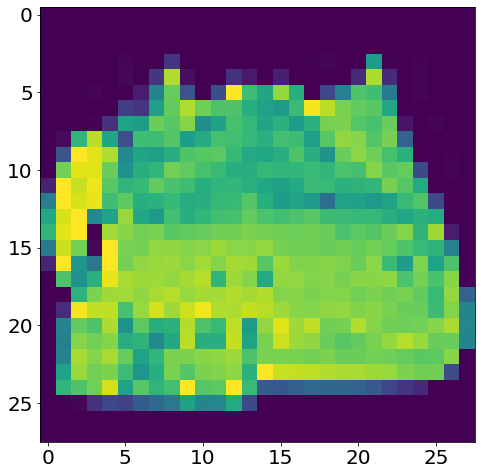

In [11]:
plt.imshow(X_train[100].reshape(28, 28))

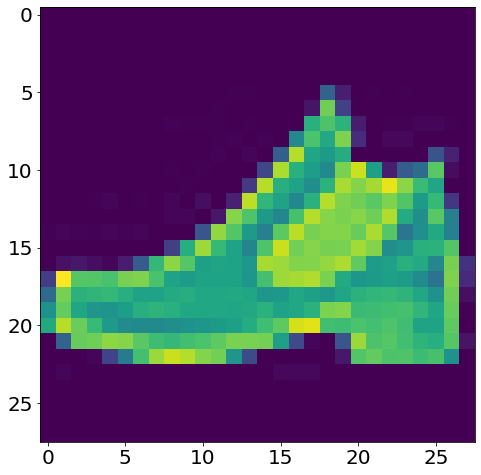

In [12]:
plt.imshow(X_train[1].reshape(28, 28))

In [13]:
M = np.array([[1, 2], [2, 3]])
M.flatten()

array([1, 2, 2, 3])

Temos 10 classes. 

In [14]:
len(set(y_train))

10

In [15]:
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
index = np.arange(len(text_labels))
labels = pd.Series(text_labels, index=index)
labels

0       t-shirt
1       trouser
2      pullover
3         dress
4          coat
5        sandal
6         shirt
7       sneaker
8           bag
9    ankle boot
dtype: object

## Executando o Scikit-Learn

Agora, vamos executar o código do sklearn na nossa base. Lembrando que temos que separar a mesma em Treino, Validação e Teste. Para tal, vamos fazer uso da classe `StratifiedKFold`. A mesma serve para realizar n-fold cross validation. A biblioteca sklearn não cria grupos de validação para você, a mesma só usa o conceito de treino/teste. De qualquer forma, validação nada mais é do que um conjunto a mais de teste. Então, vamos fazer 5-fold no nosso treino, separando em treino/validação. Note que NUNCA avaliamos nada no teste, apenas reportamos os números no fim!!

In [16]:
from sklearn.model_selection import StratifiedKFold

Ao gerar o split, teremos 20 conjuntos (muito eu sei).

In [17]:
skf = StratifiedKFold(n_splits=20, shuffle=True)

Cada passo do laço retorna indices do vetor

In [18]:
for treino, validacao in skf.split(X_train, y_train):
    count_train = np.unique(y_train[treino], return_counts=True)
    print(count_train)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([49, 37, 42, 62, 48, 39, 58, 49, 43, 48]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([49, 37, 42, 62, 48, 39, 58, 49, 43, 48]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([49, 36, 42, 62, 48, 39, 58, 50, 43, 48]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([49, 36, 42, 62, 48, 39, 58, 50, 43, 48]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([49, 36, 42, 62, 49, 38, 58, 50, 43, 48]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([49, 36, 43, 62, 49, 39, 58, 50, 42, 47]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([49, 36, 43, 62, 49, 39, 58, 50, 42, 47]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([49, 36, 43, 62, 49, 39, 58, 50, 42, 47]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([50, 36, 43, 61, 49, 39, 58, 50, 42, 47]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([50, 36, 43, 61, 49, 39

Vamos quebrar nos conjuntos e avaliar o KNN. De um mundo de métricas, vamos fazer uso de 4 neste notebook:

1. Precisão
2. Revocação
3. F1
4. Acurácia

![](https://raw.githubusercontent.com/icd-ufmg/material/master/aulas/23-MLPratica/f.png)

Na figura acima, assuma que o termo `busca` indica as previsões do seu classificador (sem tempo para alterar a figura irmão). Sendo `y_p (y-pred)` um conjunto de elementos da previsão e `y_t (y-true)` os rótulos reais. Por clareza, vamos assumir duas classes `1 e 0`. Afinal, o caso multiclasse pode ser reduzido para este. Assim, cada elemento dos vetores `y_p` e `y_t` $\in \{0, 1\}$. Os verdadeiros positivos, __true positive (TP)__, é o conjunto de previsões da classe `1` que foram corretas. Podemos formalizar como:

$$TP = \sum_i \mathbb{1}_{y_t[i] = 1} \mathbb{1}_{y_p[i] = 1}$$

$\mathbb{1}_{y_t[i] = 1}$ retorna 1 quando $y_t[i] = 1$, 0 caso contrário. O mesmo vale para $\mathbb{1}_{y_t[i] = y_p[i]}$ que retorna um quando $y_p[i] = 1$. Usando a mesma notação, os verdadeiros negativos é definido como:

$$TN = \sum_i \mathbb{1}_{y_t[i] = 0} \mathbb{1}_{y_t[i] = 0}$$

Os falsos positivos e negativos capturam os erros da previsão. Note que nos dois a previsão é o oposto do real:

$$FP = \sum_i \mathbb{1}_{y_t[i] = 0} \mathbb{1}_{y_p[i] = 1}$$

$$FN = \sum_i \mathbb{1}_{y_t[i] = 1} \mathbb{1}_{y_p[i] = 0}$$

Assim, a acurácia do classificador é definida como a fração total de acertos:

$$Acuracia = \frac{TP + TN}{TP + TN + FP + FN}$$

A precisão é definida como a fração dos elementos classificados como 1 que foram corretos:

$$Precisão = \frac{TP}{TP + FP}$$

A revocação é a fração de todos os elementos do conjunto 1 que foram acertados. Diferente da precisão, aqui focamos nos elementos reais! Na precisão focamos nas previsões.

$$Revocação = \frac{TP}{TP + FN}$$

Tanto a previsão quanto a revocação importam. Na primeira, precisão, queremos saber o quão bom o classificador é em retornar acertos. Na segunda, o quanto de elementos reais o classificador captura. Observe como um classificador que sempre retorna 1 tem revocação máxima, porém precisão baixa. Um classificador que sempre retorna 0 tem precisão máxima e revocação baixa. Para captura a média harmônica dos dois usamos o F1-score:

$$F1 = MediaHarmonica(Precisao, Revocacao)$$

Dependendo do problema uma métrica pode importar mais do que a outra. Aqui, trabalhamos com classes balanceadas, então a acurácia já é boa suficiente. Vamos avaliar a acurácia nos conjuntos abaixo:

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Observe como o laço abaixo guarda o melhor valor de n para cada fold de validação!

In [20]:
fold = 0
melhores = []
for treino, validacao in skf.split(X_train, y_train):
    X_tt = X_train[treino]
    y_tt = y_train[treino]
    X_v = X_train[validacao]
    y_v = y_train[validacao]
    
    best = (0, 0)
    for nn in [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100]: # Vamos testar tais valores de n
        model = KNeighborsClassifier(n_neighbors=nn)
        model.fit(X_tt, y_tt) # treina no conjunto de treino
        y_pv = model.predict(X_v) # previsões no conjunto de validação
        
        # Resultado com melhor acurácia!
        accuracy = accuracy_score(y_v, y_pv)
        if accuracy > best[0]:
            best = (accuracy, nn)
    
    melhores.append(best[1])
    fold += 1
    print('Fold-{}, melhor nn = {}, acc = {}'.format(fold, best[1], best[0]))

Fold-1, melhor nn = 4, acc = 0.68
Fold-2, melhor nn = 2, acc = 0.68
Fold-3, melhor nn = 2, acc = 0.76
Fold-4, melhor nn = 4, acc = 0.76
Fold-5, melhor nn = 20, acc = 0.72
Fold-6, melhor nn = 3, acc = 0.76
Fold-7, melhor nn = 2, acc = 0.8
Fold-8, melhor nn = 7, acc = 0.88
Fold-9, melhor nn = 2, acc = 0.76
Fold-10, melhor nn = 2, acc = 0.68
Fold-11, melhor nn = 7, acc = 0.64
Fold-12, melhor nn = 2, acc = 0.72
Fold-13, melhor nn = 10, acc = 0.88
Fold-14, melhor nn = 6, acc = 0.76
Fold-15, melhor nn = 7, acc = 0.84
Fold-16, melhor nn = 4, acc = 0.84
Fold-17, melhor nn = 2, acc = 0.84
Fold-18, melhor nn = 2, acc = 0.68
Fold-19, melhor nn = 6, acc = 0.88
Fold-20, melhor nn = 20, acc = 0.8


Vamos ver quantas vezes cada escolha de número de vizinhos, nn, ganhou na validação.

Text(0, 0.5, 'Count na validação')

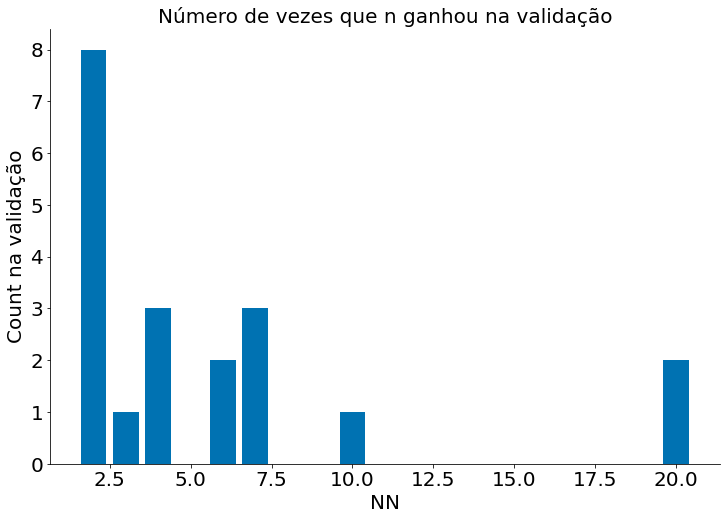

In [21]:
unique, counts = np.unique(melhores, return_counts=True)
plt.bar(unique, counts)
despine()
plt.title('Número de vezes que n ganhou na validação')
plt.xlabel('NN')
plt.ylabel('Count na validação')

Agora, podemos finalmente avaliar o modelo no conjunto de teste! Vamos escolher n como a médiana dos folds.

In [22]:
print(np.median(melhores))

4.0


Vamos verificar as outras métricas e todas as classes.

In [23]:
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        53
           1       0.95      0.97      0.96        40
           2       0.53      0.62      0.57        63
           3       0.86      0.93      0.90        46
           4       0.63      0.60      0.62        55
           5       0.94      0.60      0.73        52
           6       0.53      0.43      0.47        49
           7       0.71      0.87      0.78        52
           8       0.94      0.79      0.86        43
           9       0.83      0.96      0.89        47

    accuracy                           0.74       500
   macro avg       0.76      0.75      0.75       500
weighted avg       0.75      0.74      0.74       500



Parece que erramos muito a classe 4, coat. Casacos se parecem com camisas, vestidos etc. Podemos investigar isto usando a matriz de confusão.

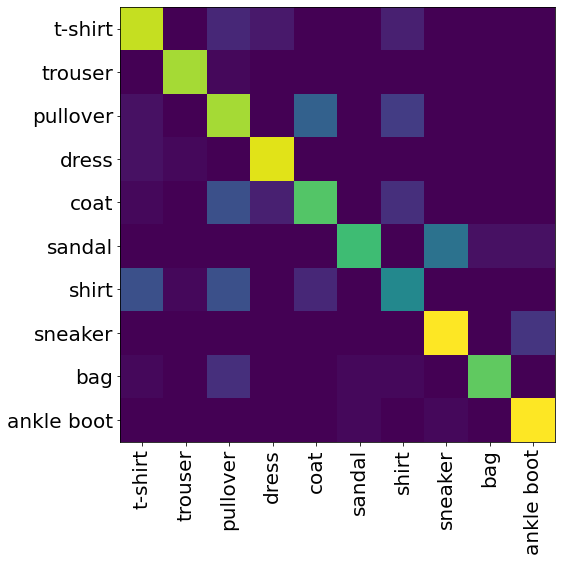

In [24]:
from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(y_test, model.predict(X_test)))
plt.xticks(labels.index, labels, rotation=90)
plt.yticks(labels.index, labels);

## Logística

Vamos repetir tudo para a regressão logística. Felizmente, o sklearn tem uma versão da logística que já faz treino/validação internamente. Para alguns modelos, existem atalhos para fazer isto. Caso queira entender, leia:

https://robjhyndman.com/hyndsight/crossvalidation/

In [25]:
from sklearn.linear_model import LogisticRegressionCV

In [26]:
# O LogisticCV tenta várias regularizações.
model = LogisticRegressionCV(Cs=100,
                             penalty='l2',   #ridge
                             cv=5,           #5 folds internos
                             fit_intercept=False,
                             solver='liblinear',
                             multi_class='ovr')
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, cv=5, fit_intercept=False, multi_class='ovr',
                     solver='liblinear')

In [27]:
model.C_

array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001])

In [28]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.64      0.72        53
           1       1.00      0.97      0.99        40
           2       0.69      0.54      0.61        63
           3       0.75      0.91      0.82        46
           4       0.59      0.75      0.66        55
           5       1.00      0.69      0.82        52
           6       0.52      0.65      0.58        49
           7       0.85      0.87      0.86        52
           8       0.89      0.79      0.84        43
           9       0.82      0.98      0.89        47

    accuracy                           0.77       500
   macro avg       0.79      0.78      0.78       500
weighted avg       0.79      0.77      0.77       500



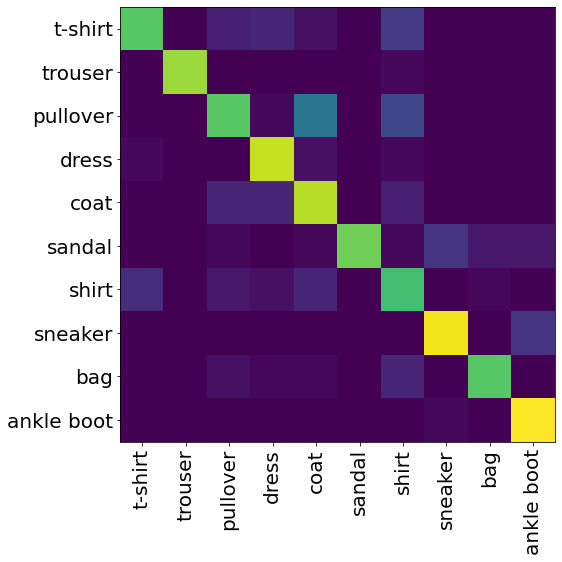

In [29]:
plt.imshow(confusion_matrix(y_test, model.predict(X_test)))
plt.xticks(labels.index, labels, rotation=90)
plt.yticks(labels.index, labels);

## Regressão

Agora vamos avaliar modelos de regressão em dados tabulares. Primeiro, vamos carregar os dados. Obsevre que cada atributo é diferente. Data, numéricos categóricos, etc...

In [30]:
df = pd.read_csv('walmart.csv', on_bad_lines='skip')
df = df.iloc[:, :-1]
df.head()

,Store,Date,Weekly_Sales_Store,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Total Markdown,Total Sales,SalesPerSqFt
0,1,5/2/2010,1643690.90,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,0.0,1643690.90,10.862710
1,1,12/2/2010,1641957.44,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,0.0,1641957.44,10.851254
2,1,19/2/2010,1611968.17,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,0.0,1611968.17,10.653063
3,1,26/2/2010,1409727.59,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,0.0,1409727.59,9.316509
4,1,5/3/2010,1554806.68,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,0.0,1554806.68,10.275298


Vamos criar o treino e teste

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [33]:
df.shape

(6435, 18)

In [34]:
train_df.shape

(5148, 18)

In [35]:
test_df.shape

(1287, 18)

Segundo, temos que converter os atributos categóricos em colunas novas. Para isto, fazemos uso de one hot encoding. Cada categoria vira uma coluna de 1/0. Algoritmos como KNN e Logistic não sabem fazer uso de categorias por padrão. Mesmo se as categorias representarem números, faça uso de one hot. Sempre se pergunte: faz sentido computar uma distância nessa coluna? Se não, one-hot (ou outra abordagem).

In [36]:
train_df = train_df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis='columns')
test_df = test_df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis='columns')

In [37]:
train_df.head()

,Store,Date,Weekly_Sales_Store,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Total Markdown,Total Sales,SalesPerSqFt
1873,14,14/5/2010,2129771.13,False,54.26,2.982,181.661279,8.899,A,200898,0.00,2129771.13,10.601256
413,3,13/7/2012,416913.10,False,82.28,3.256,225.434007,6.334,B,37392,3973.11,420886.21,11.256050
4048,29,10/12/2010,713834.74,False,28.43,3.132,132.676400,10.524,B,93638,0.00,713834.74,7.623345
2368,17,19/8/2011,797523.04,False,67.59,3.578,129.240581,6.745,B,93188,0.00,797523.04,8.558216
1465,11,8/10/2010,1293472.80,False,68.71,2.633,215.060858,7.564,A,207499,0.00,1293472.80,6.233634


In [38]:
train_df.dtypes

Store                   int64
Date                   object
Weekly_Sales_Store    float64
IsHoliday                bool
Temperature           float64
Fuel_Price            float64
CPI                   float64
Unemployment          float64
Type                   object
Size                    int64
Total Markdown        float64
Total Sales           float64
SalesPerSqFt          float64
dtype: object

Vamos inicialmente converter a data. Note que a mesma existe em uma escala completamente diferente do resto. O split abaixo quebra o texto da data.

In [39]:
train_df['Date'].str.split('/')

1873     [14, 5, 2010]
413      [13, 7, 2012]
4048    [10, 12, 2010]
2368     [19, 8, 2011]
1465     [8, 10, 2010]
             ...      
1870     [23, 4, 2010]
5763     [3, 12, 2010]
4307      [4, 6, 2010]
3512     [19, 8, 2011]
131      [10, 8, 2012]
Name: Date, Length: 5148, dtype: object

Agora pegamos o mês

In [40]:
for split in train_df['Date'].str.split('/'):
    print(split[1])
    break

5


In [41]:
train_df['Month'] = [split[1] for split in train_df['Date'].str.split('/')]
test_df['Month'] = [split[1] for split in test_df['Date'].str.split('/')]

In [42]:
test_df.head()

,Store,Date,Weekly_Sales_Store,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Total Markdown,Total Sales,SalesPerSqFt,Month
5311,38,25/6/2010,322046.76,False,87.27,3.084,126.126600,14.099,C,39690,0.00,322046.76,8.114053,6
2295,17,26/3/2010,793097.64,False,35.59,2.819,126.605064,6.548,B,93188,0.00,793097.64,8.510727,3
3071,22,27/5/2011,1021568.34,False,62.59,4.034,138.678283,8.252,B,119557,0.00,1021568.34,8.544613,5
2825,20,2/3/2012,2148822.76,False,39.98,3.816,213.671813,6.961,A,203742,64587.65,2213410.41,10.863791,3
2826,20,9/3/2012,2139265.40,False,41.14,3.848,213.871114,6.961,A,203742,18826.01,2158091.41,10.592276,3


Removendo a data

In [43]:
train_df = train_df.drop(['Date'], axis='columns')
test_df = test_df.drop(['Date'], axis='columns')
train_df.shape

(5148, 13)

One hot encoding do resto categórico

In [44]:
cols_usar = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size',
             'Weekly_Sales_Store',
             'Store', 'Month', 'Type', 'IsHoliday']
cols_cat = ['Store', 'Month', 'Type', 'IsHoliday']
train_df = pd.get_dummies(train_df[cols_usar],
                          columns=cols_cat)
test_df = pd.get_dummies(test_df[cols_usar],
                         columns=cols_cat)

Vamos focar em poucos pontos para o notebook executar e só olhar para o teste no fim de tudo!

In [45]:
train_df = train_df.sample(1000)
test_df = test_df.sample(1000)

*Normalizando dados*: Como trabalhar com esse mundo de valores distintos? Solução!? Normalizar!

In [46]:
y_train_df = train_df['Weekly_Sales_Store']
X_train_df = train_df.drop('Weekly_Sales_Store', axis='columns')

In [47]:
X_train_df

,Temperature,Fuel_Price,CPI,Unemployment,Size,Store_1,Store_2,Store_3,Store_4,Store_5,...,Month_5,Month_6,Month_7,Month_8,Month_9,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True
552,80.94,3.372,130.829533,4.308,205863,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1376,77.91,3.842,129.782161,7.874,126512,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5807,58.74,3.498,194.945972,6.759,196321,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
947,37.49,3.548,195.178999,8.513,70713,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3162,69.26,2.906,132.293936,5.435,114533,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,33.40,3.191,196.956530,8.256,203007,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2068,57.07,4.211,134.593000,7.658,123737,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
5245,58.31,3.159,217.878134,7.716,39910,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2427,52.81,3.815,131.075667,5.527,93188,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [48]:
from sklearn.preprocessing import StandardScaler

**IMPORTANTE SÓ NORMALIZE O TREINO!!! DEPOIS USE A MÉDIA E DESVIO DO TREINO PARA NORMALIZAR O TESTE!!**

**O TESTE É UM FUTURO! NÃO EXISTE, VOCÊ NÃO SABE NADA DO MESMO**

In [49]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_x.fit_transform(X_train_df.values)
y_train = scaler_y.fit_transform(y_train_df.values[:, np.newaxis])

In [50]:
X_train

array([[ 1.0872153 ,  0.01864001, -1.03364357, ..., -0.37623465,
         0.25264558, -0.25264558],
       [ 0.92104679,  1.04078509, -1.06031538, ..., -0.37623465,
         0.25264558, -0.25264558],
       [-0.13025691,  0.29266188,  0.59911109, ..., -0.37623465,
         0.25264558, -0.25264558],
       ...,
       [-0.15383858, -0.44458744,  1.18308914, ...,  2.65791575,
         0.25264558, -0.25264558],
       [-0.45546458,  0.98206612, -1.02737567, ..., -0.37623465,
         0.25264558, -0.25264558],
       [ 1.13328181, -1.69943363,  1.05988038, ..., -0.37623465,
         0.25264558, -0.25264558]])

In [51]:
y_train

array([[ 2.11179373e+00],
       [ 1.23927519e+00],
       [ 4.02883421e-01],
       [-8.82302201e-01],
       [ 9.26963464e-01],
       [-1.43567270e-01],
       [ 4.47272548e+00],
       [-1.41490666e-01],
       [ 1.57820465e+00],
       [-1.14467652e+00],
       [ 4.91371964e-01],
       [-9.90656930e-01],
       [-1.82763223e-01],
       [-9.47780820e-01],
       [ 1.00234506e+00],
       [ 2.79450095e-01],
       [-2.42999376e-01],
       [-3.28434727e-01],
       [-7.86361599e-01],
       [ 3.22292895e-01],
       [-1.24339657e+00],
       [-1.24794206e+00],
       [ 4.96822990e-01],
       [ 5.27481040e-01],
       [-1.04884632e+00],
       [-7.19232286e-01],
       [ 6.97719221e-01],
       [ 5.84743486e-01],
       [ 1.53766831e+00],
       [-5.54472209e-02],
       [ 1.45939982e+00],
       [-2.03940735e-01],
       [-5.47925940e-02],
       [-3.88204155e-01],
       [-1.05387964e+00],
       [-8.51375977e-01],
       [ 1.02871849e+00],
       [ 1.40359979e+00],
       [-6.7

In [52]:
from sklearn.linear_model import LinearRegression # sem regularizar
from sklearn.linear_model import Lasso # com regularização l1
from sklearn.linear_model import Ridge # com regularização l2
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV

O gridsearch cv faz o laço que fizemos na mão acima (conjuntos de validação)

In [53]:
linear = LinearRegression(fit_intercept=False)
lasso = GridSearchCV(Lasso(fit_intercept=False),
                     cv=10,
                     refit=True,
                     param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

ridge = GridSearchCV(Ridge(fit_intercept=False),
                     cv=10,
                     refit=True,
                     param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

knn = GridSearchCV(KNeighborsRegressor(),
                   cv=10,
                   refit=True,
                   param_grid={'n_neighbors': [2, 3, 5, 7, 11, 13],
                               'weights': ['uniform', 'distance']})

In [54]:
linear = linear.fit(X_train, y_train)
linear.score(X_train, y_train)

0.9536154330875907

In [55]:
lasso = lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.9533449275796007

In [56]:
ridge = ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.9533899548863546

In [57]:
knn = knn.fit(X_train, y_train)
knn.score(X_train, y_train)

1.0

In [58]:
knn.best_params_

{'n_neighbors': 11, 'weights': 'distance'}

Agora vamos usar o Bootstrap para entender o erro dos modelos caso eu repita o experimento.

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
y_pred = linear.predict(X_train)
mean_squared_error(y_train, y_pred)

0.046384566912409296

In [61]:
def bootstrap_score(X, y, model, n=1000):
    size = len(y)    
    samples = np.zeros(size)
    for i in range(size):
        # Gera amostras com reposição
        idx = np.random.choice(size, size)
        Xb = X[idx]
        yb = y[idx]
        
        err = mean_squared_error(yb, model.predict(Xb))
        samples[i] = err
    return samples

In [62]:
y_test_df = test_df['Weekly_Sales_Store']
X_test_df = test_df.drop('Weekly_Sales_Store', axis='columns')

In [63]:
X_test = scaler_x.transform(X_test_df.values)
y_test = scaler_y.transform(y_test_df.values[:, np.newaxis])

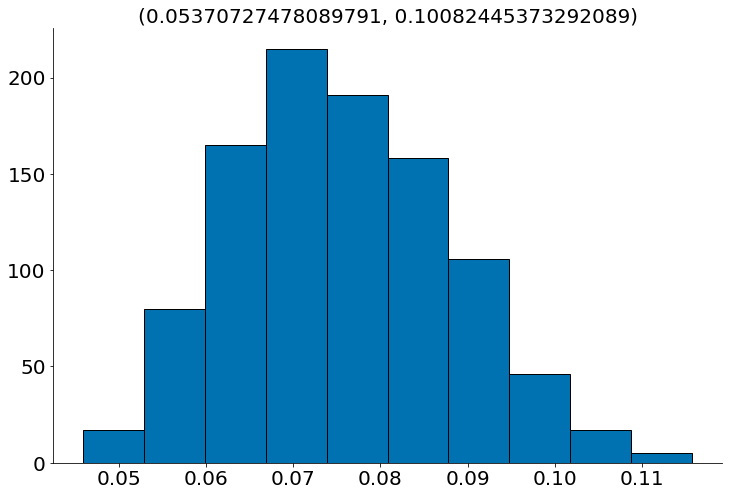

In [64]:
samples = bootstrap_score(X_test, y_test, knn)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(ss.scoreatpercentile(samples, 2.5),
                            ss.scoreatpercentile(samples, 97.5)))
despine()

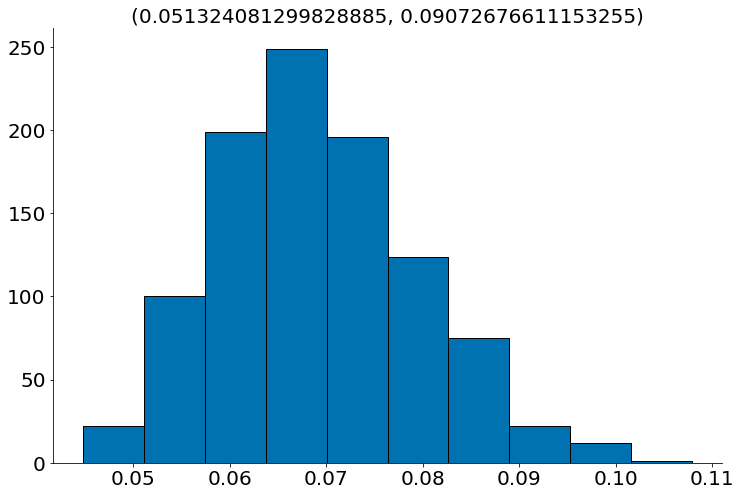

In [65]:
samples = bootstrap_score(X_test, y_test, lasso)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(ss.scoreatpercentile(samples, 2.5),
                            ss.scoreatpercentile(samples, 97.5)))
despine()